In [ ]:
# environment setup
try:
    import google.colab
    !git clone https://github.com/DevSlem/Jinsan-AI.git
    %cd Jinsan-AI
except ImportError:
    pass

Cloning into 'AI-Lecture-Incheon-Youngsun-HS'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'AI-Lecture-Incheon-Youngsun-HS'
/content


# 1\. Dataset load

In [ ]:
# @title Dataset load
import pandas as pd
import numpy as np

# Train 과 Test 데이터를 준비
train_dt = pd.read_csv('data/titanic/train.csv')
test_dt = pd. read_csv('data/titanic/test.csv')

# 한번에 처리하기 위한 작업
data_train_test = [train_dt, test_dt]

data_train_test[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# @title FEATURE 별 정보
"""
1. PassengerId (승객 ID)
각 승객을 고유하게 식별하는 번호


2. Survived (생존 여부)
승객의 생존 여부
  0: 사망
  1: 생존


3. Pclass (티켓 클래스)
승객의 티켓 등급
  1: 1등석
  2: 2등석
  3: 3등석

4. Name (이름)
승객의 이름


5. Sex (성별)
승객의 성별을 나타냄
  male: 남성
  female: 여성


6. Age (나이) - 결측치 존재
승객의 나이


7. SibSp (형제자매/배우자 수)
승객과 함께 탑승한 형제자매 또는 배우자의 수


8. Parch (부모/자녀 수)
승객과 함께 탑승한 부모 또는 자녀의 수


9. Ticket (티켓 번호)
승객의 티켓 번호


10. Fare (운임 요금)
승객이 지불한 운임 요금


11. Cabin (선실 번호) - 결측치 존재
승객이 탑승한 선실의 번호


12. Embarked (승선 항구) - 결측치 존재
승객이 탑승한 항구
  C: Cherbourg
  Q: Queenstown
  S: Southampton
"""

# 2\. Dataset 기본 분석

In [ ]:
# @title Dataset 기본 통계 분석 : describe()

# include='all' 설정 시 모든 열에 대한 결과를 볼 수 있음
data_train_test[0].describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
# @title dataframe 정보 출력 : info()
data_train_test[0].info()
print("-"*50)
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [ ]:
# @title numerical, categorical variables 구분
cat_cols=data_train_test[0].select_dtypes(include=['object']).columns
num_cols = data_train_test[0].select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Numerical Variables:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
# @title 결측치가 존재하는 컬럼 명

# In train data
null_columns = data_train_test[0].columns[data_train_test[0].isnull().any()]
print("nul columns : ", null_columns)
print('-'*50)
print("null rate")
print()
print((data_train_test[0].isnull().sum()/(len(data_train_test[0])))*100)

# In test data
null_columns = test_dt.columns[test_dt.isnull().any()]
print("nul columns : ", null_columns)
print('-'*50)
print("null rate")
print()
print((test_dt.isnull().sum()/(len(test_dt)))*100)

nul columns :  Index(['Age', 'Cabin', 'Embarked'], dtype='object')
--------------------------------------------------
null rate

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
nul columns :  Index(['Age', 'Fare', 'Cabin'], dtype='object')
--------------------------------------------------
null rate

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


# 3\. feature별 분석 및 전처리



## 3.1 필요 라이브러리 준비

In [ ]:
# @title 시각화 준비
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", font_scale=2)


## 3.2 PassengerId

In [ ]:
# @title Column name : PassengerId - 각 승객을 고유하게 식별하는 번호

# 각 승객 별 고유 id가 할당되었음을 확인
print(f"PassengerId duplicate check : {data_train_test[0]['PassengerId'].duplicated().sum() == 0}")

PassengerId duplicate check : True


## 3.3 Survived

In [ ]:
# @title Column name : Survived - 승객의 생존 여부

print(f"unique values : {data_train_test[0]['Survived'].unique()}")
print("-"*50)
data_train_test[0]['Survived'].value_counts()

unique values : [0 1]
--------------------------------------------------


,count
Survived,
0,549
1,342


<ipython-input-11-0b3b6bbdc5d8>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set(xlabel='', xticklabels=labels)


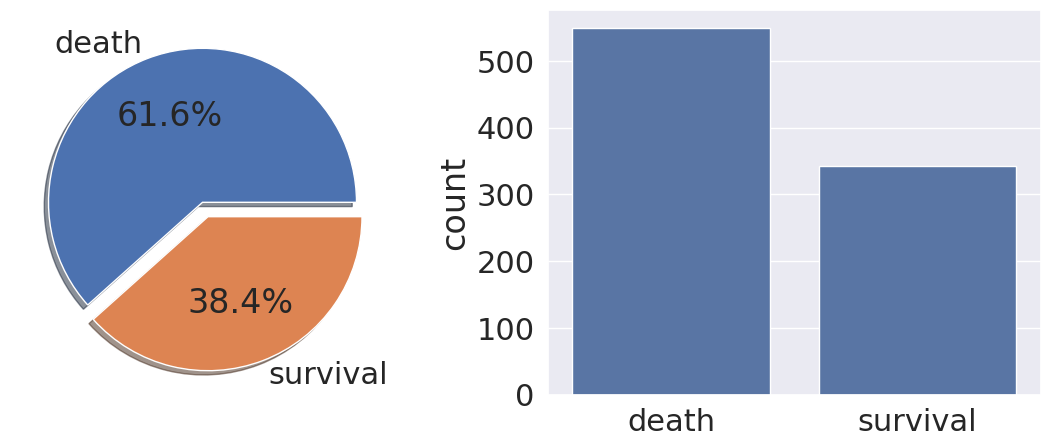

In [ ]:
# @title Column name : Survived - 시각화

# 수치상으로 사망자의 수가 더 많음
# pie plot과 bar plot을 사용해 시각화 해봄

fig, ax = plt.subplots(1, 2, figsize=(14,5))
labels = ['death', 'survival']

# Pie Plot
data_train_test[0]['Survived'].value_counts().plot.pie(ax=ax[0], explode=[0,0.1], shadow=True, autopct='%1.1f%%', labels=labels)
ax[0].set(ylabel='')

# Count Plot
sns.countplot(data=data_train_test[0], x='Survived', ax=ax[1])
ax[1].set(xlabel='', xticklabels=labels)

plt.show()

## 3.4 Name

In [ ]:
# @title Column name : Name - 승객의 이름
print(data_train_test[0]['Name'].unique()[:50])
print("-"*50)
data_train_test[0]['Name'].value_counts()

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'Todoro

,count
Name,
"Braund, Mr. Owen Harris",1
"Boulos, Mr. Hanna",1
"Frolicher-Stehli, Mr. Maxmillian",1
"Gilinski, Mr. Eliezer",1
"Murdlin, Mr. Joseph",1
...,...
"Kelly, Miss. Anna Katherine ""Annie Kate""",1
"McCoy, Mr. Bernard",1
"Johnson, Mr. William Cahoone Jr",1


In [ ]:
# @title Column name : Name - 전처리

# 정규식을 이용해 Title로 호칭 추출
for data in data_train_test:
    data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

for data in data_train_test:
    data['Title'] = data['Title'].replace(['Capt', 'Col', 'Countess', 'Dr', 'Jonkheer', 'Major', 'Rev', 'Sir'], 'Others')
    data['Title'] = data['Title'].replace(['Mlle', 'Ms'], 'Miss')
    data['Title'] = data['Title'].replace('Don', 'Mr')
    data['Title'] = data['Title'].replace(['Mme', 'Lady', 'Dona'], 'Mrs')

# Name 삭제
for data in data_train_test:
    data.drop('Name', inplace=True, axis=1)

# 변경할 값을 dir로 저장
Title_mapping = {'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Others':4}

for data in data_train_test:
    data['Title'] = data['Title'].map(Title_mapping).astype(int)

<ipython-input-14-5171c76d10f9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=title_survival, x='Title', y='Survived', ax=ax[1], palette='viridis')
<ipython-input-14-5171c76d10f9>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Mr', 'Mrs', 'Miss','Master','Others'])


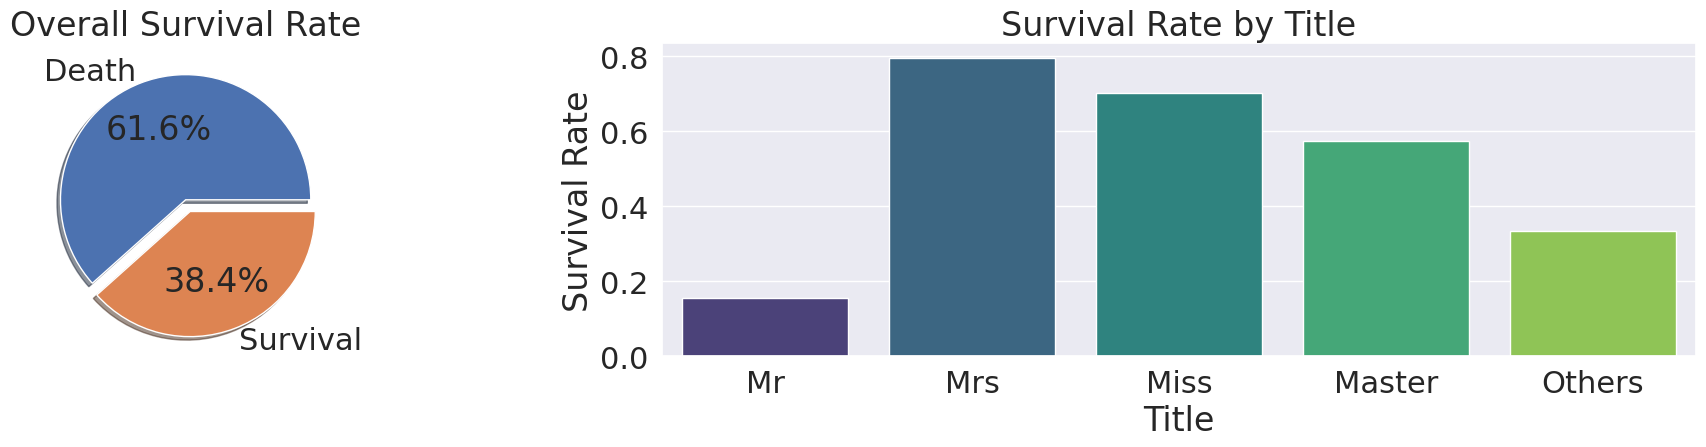

In [ ]:
# @title Column name : Name - 시각화
title_survival = data_train_test[0][['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(21, 5))

labels = ['Death', 'Survival']
data_train_test[0]['Survived'].value_counts().plot.pie(ax=ax[0], explode=[0, 0.1], shadow=True, autopct='%1.1f%%', labels=labels)
ax[0].set(ylabel='', title='Overall Survival Rate')

sns.barplot(data=title_survival, x='Title', y='Survived', ax=ax[1], palette='viridis')
ax[1].set(title='Survival Rate by Title', ylabel='Survival Rate', xlabel='Title')
ax[1].set_xticklabels(['Mr', 'Mrs', 'Miss','Master','Others'])

plt.tight_layout()
plt.show()

In [ ]:
# @title Column name : Name - One-Hot Encoding

for i in range(len(data_train_test)):
    dummies_train = pd.get_dummies(data_train_test[i]['Title'], prefix='Title', drop_first=False)
    data_train_test[i] = pd.concat([data_train_test[i], dummies_train], axis=1)
    print(data_train_test[i].columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Title_4'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title', 'Title_0', 'Title_1', 'Title_2',
       'Title_3', 'Title_4'],
      dtype='object')


## 3.5 Pclass

In [ ]:
# @title Column name : Pclass - 승객의 티켓 등급
print(f"unique values : {data_train_test[0]['Pclass'].unique()}")
print("-"*50)
data_train_test[0]['Pclass'].value_counts()


unique values : [3 1 2]
--------------------------------------------------


,count
Pclass,
3,491
1,216
2,184


<ipython-input-17-04bc2291bb72>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_train_test[0], x='Pclass', ax=ax[0], palette='muted')
<ipython-input-17-04bc2291bb72>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pclass_survival, x='Pclass', y='Survived', ax=ax[1], palette='viridis')


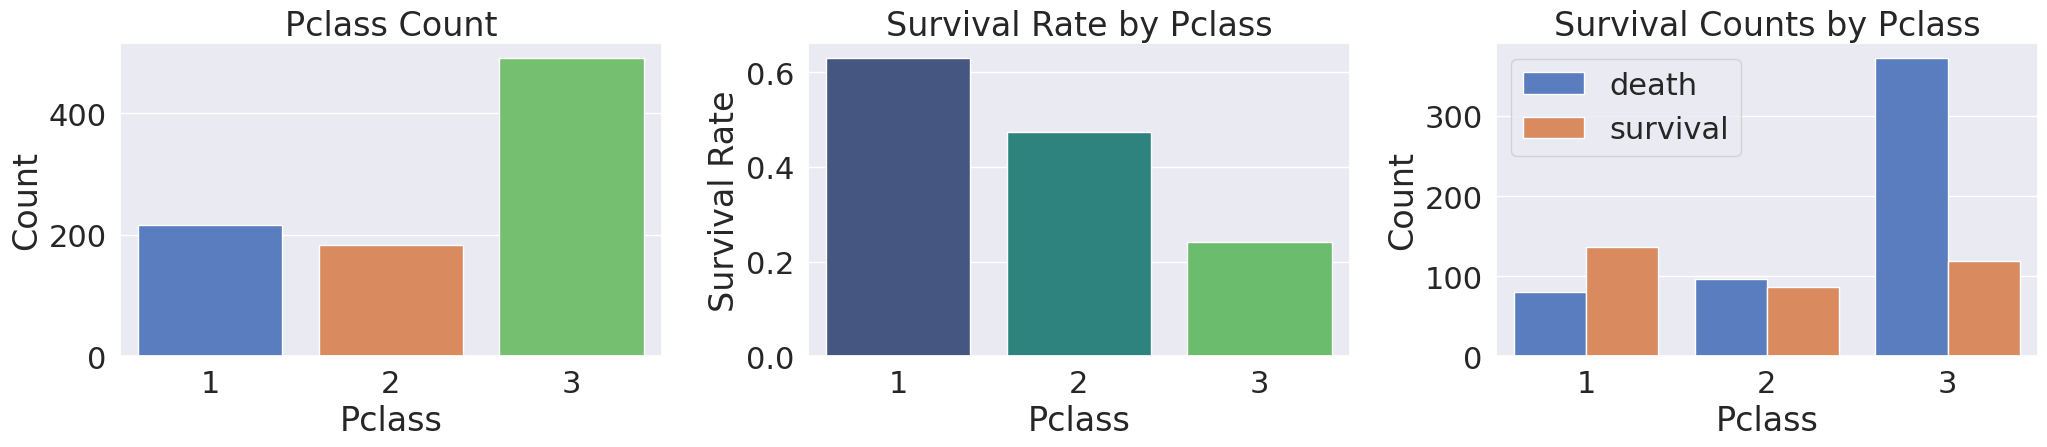

In [ ]:
# @title Column name : Pclass - 시각화

# 1등석의 생존율이 가장 높고 3등석의 생존율이 가장 낮음

pclass_survival = data_train_test[0][['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

fig, ax = plt.subplots(1, 3, figsize=(21, 5))

sns.countplot(data=data_train_test[0], x='Pclass', ax=ax[0], palette='muted')
ax[0].set(title='Pclass Count', ylabel='Count', xlabel='Pclass')

sns.barplot(data=pclass_survival, x='Pclass', y='Survived', ax=ax[1], palette='viridis')
ax[1].set(title='Survival Rate by Pclass', ylabel='Survival Rate', xlabel='Pclass')

sns.countplot(data=data_train_test[0], x='Pclass', hue='Survived', ax=ax[2], palette='muted')
ax[2].set(title='Survival Counts by Pclass', xlabel='Pclass', ylabel='Count')
labels=['death', 'survival']
ax[2].legend(labels=labels)

plt.tight_layout()
plt.show()

## 3.6 Sex

In [ ]:
# @title Column name : Sex - 승객의 성별
print(f"unique values : {data_train_test[0]['Sex'].unique()}")
print("-"*50)
data_train_test[0]['Sex'].value_counts()

unique values : ['male' 'female']
--------------------------------------------------


,count
Sex,
male,577
female,314


<ipython-input-19-9b80e0ffed50>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_train_test[0], x='Sex', ax=ax[0], palette='muted')
<ipython-input-19-9b80e0ffed50>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Sex_survival, x='Sex', y='Survived', ax=ax[1], palette='viridis')


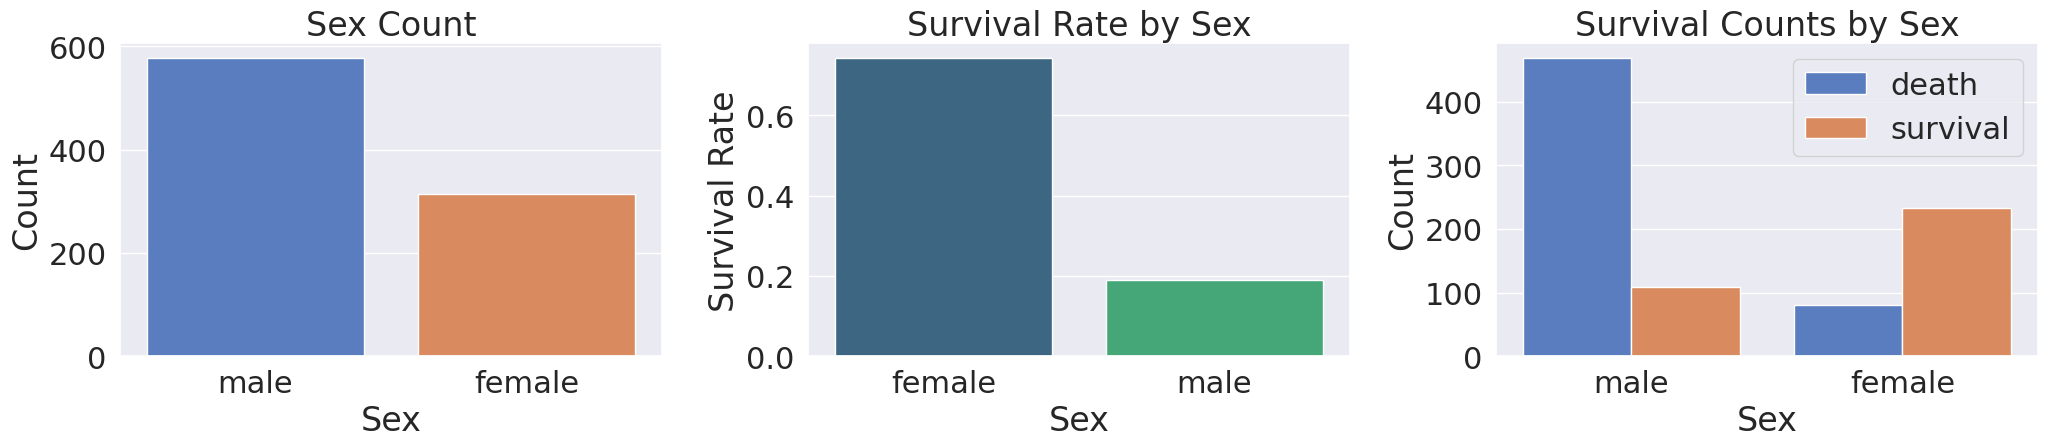

In [ ]:
# @title Column name : Sex - 시각화

Sex_survival = data_train_test[0][['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

fig, ax = plt.subplots(1, 3, figsize=(21, 5))

sns.countplot(data=data_train_test[0], x='Sex', ax=ax[0], palette='muted')
ax[0].set(title='Sex Count', ylabel='Count', xlabel='Sex')

sns.barplot(data=Sex_survival, x='Sex', y='Survived', ax=ax[1], palette='viridis')
ax[1].set(title='Survival Rate by Sex', ylabel='Survival Rate', xlabel='Sex')

sns.countplot(data=data_train_test[0], x='Sex', hue='Survived', ax=ax[2], palette='muted')
ax[2].set(title='Survival Counts by Sex', xlabel='Sex', ylabel='Count')
labels=['death', 'survival']
ax[2].legend(labels=labels)

plt.tight_layout()
plt.show()

In [ ]:
# @title Column name : Sex - 전처리
for data in data_train_test:
    data['Sex'] = data['Sex'].map({'male':0, 'female':1}).astype(int)
data_train_test[0]['Sex'].head()

,Sex
0,0
1,1
2,1
3,1
4,0


## 3.7 Age

In [ ]:
# @title Column name : Age - 승객의 나이

print(f"unique values : {data_train_test[0]['Age'].unique()}")
print("-"*50)
data_train_test[0]['Age'].value_counts()

unique values : [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
--------------------------------------------------


,count
Age,
24.00,30
22.00,27
18.00,26
19.00,25
28.00,25
...,...
36.50,1
55.50,1
0.92,1


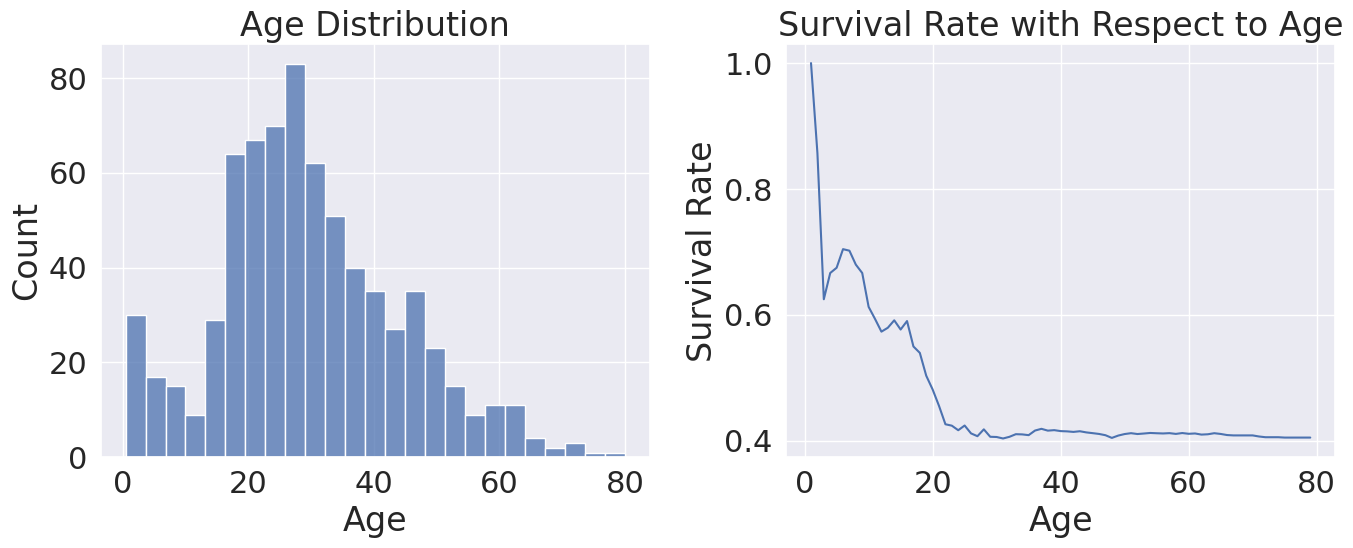

In [ ]:
# @title Column name : Age - 시각화

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data_train_test[0]['Age'], bins=25, ax=ax[0])
ax[0].set(title='Age Distribution', xlabel='Age', ylabel='Count')

# 나이별 생존율 계산
age_range_survival_ratio = []
for i in range(1, 80):
    survival_rate = data_train_test[0][data_train_test[0]['Age'] < i]['Survived'].sum() / len(data_train_test[0][data_train_test[0]['Age'] < i]['Survived'])
    age_range_survival_ratio.append(survival_rate)

ax[1].plot(range(1, 80), age_range_survival_ratio)
ax[1].set(title='Survival Rate with Respect to Age', xlabel='Age', ylabel='Survival Rate')

plt.tight_layout()
plt.show()


In [ ]:
# @title Column name : Age - 결측치 제거

# Age 결측값에 Title별 나이의 평균값으로 변경
title_age_mean = data_train_test[0].groupby('Title')['Age'].mean()
print(title_age_mean)
for data in data_train_test:
    data['Age'].fillna(data.groupby('Title')['Age'].transform('mean'), inplace=True)

# 결측값 확인
print("-"*50)
print("null rate")
print()
print("결측치 제거 후 Age 결측치 수:", data_train_test[0]['Age'].isnull().sum())

Title
0    32.387218
1    35.900000
2    21.845638
3     4.574167
4    45.700000
Name: Age, dtype: float64
--------------------------------------------------
null rate

결측치 제거 후 Age 결측치 수: 0


<ipython-input-23-e41578d7ae4a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data.groupby('Title')['Age'].transform('mean'), inplace=True)


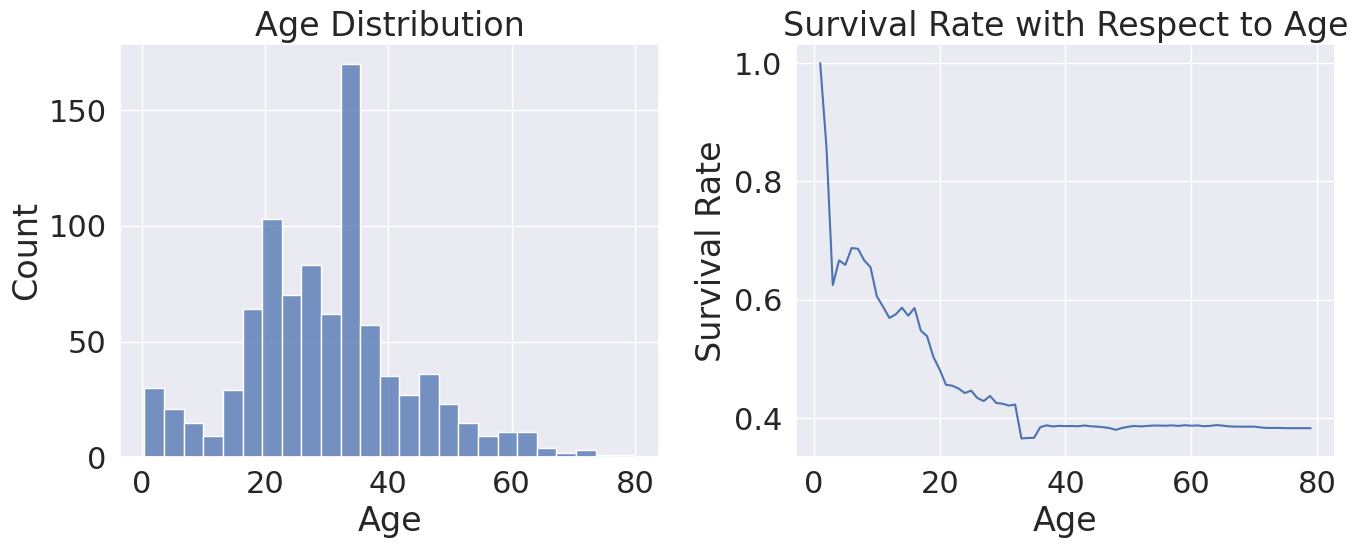

In [ ]:
# @title Column name : Age - 시각화

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data_train_test[0]['Age'], bins=25, ax=ax[0])
ax[0].set(title='Age Distribution', xlabel='Age', ylabel='Count')

# 나이별 생존율 계산
age_range_survival_ratio = []
for i in range(1, 80):
    survival_rate = data_train_test[0][data_train_test[0]['Age'] < i]['Survived'].sum() / len(data_train_test[0][data_train_test[0]['Age'] < i]['Survived'])
    age_range_survival_ratio.append(survival_rate)

ax[1].plot(range(1, 80), age_range_survival_ratio)
ax[1].set(title='Survival Rate with Respect to Age', xlabel='Age', ylabel='Survival Rate')

plt.tight_layout()
plt.show()


In [ ]:
# @title Column name : Age - 전처리

# AgeRange에 N등분 한 범위를 넣어줍니다.
data_train_test[0]['AgeRange'] = pd.cut(data_train_test[0]['Age'], 5)

# AgeRange 범위 대로 값 변경
for data in data_train_test:
    data.loc[ data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age'] = 4
    # int 로 변경
    data['Age'] = data['Age'].astype(int)
data_train_test[0]['Age'].head()

,Age
0,1
1,2
2,1
3,2
4,2


<ipython-input-26-27ec57b53bf0>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rate = data_train_test[0][['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean().sort_values(by='AgeRange', ascending=True)
<ipython-input-26-27ec57b53bf0>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Death', 'Survival'])


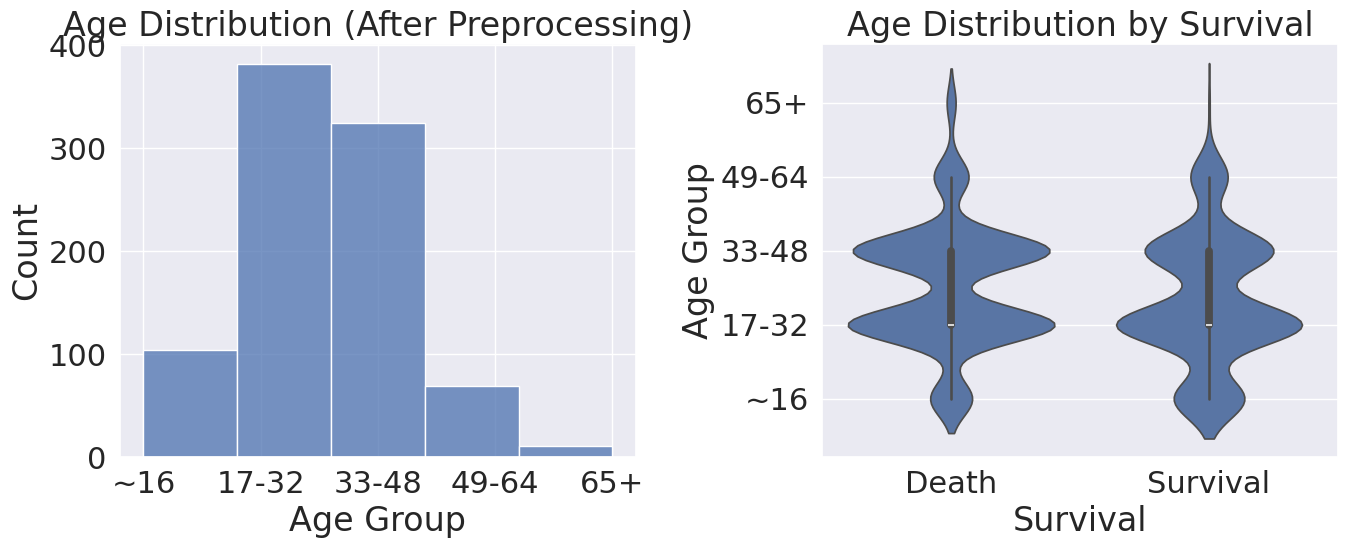

In [ ]:
# @title Column name : Age - 시각화

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

age_survival_rate = data_train_test[0][['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean().sort_values(by='AgeRange', ascending=True)
age_group_labels = ['~16', '17-32', '33-48', '49-64', '65+']

sns.histplot(data_train_test[0]['Age'], bins=5, ax=ax[0])
ax[0].set(title='Age Distribution (After Preprocessing)', xlabel='Age Group', ylabel='Count')
ax[0].set_xticks(range(5))
ax[0].set_xticklabels(age_group_labels)

sns.violinplot(data=data_train_test[0], x='Survived', y='Age', ax=ax[1])
ax[1].set(title='Age Distribution by Survival', xlabel='Survival', ylabel='Age Group')
ax[1].set_xticklabels(['Death', 'Survival'])
ax[1].set_yticks(range(5))
ax[1].set_yticklabels(age_group_labels)

plt.tight_layout()
plt.show()

# AgeRange 삭제
data_train_test[0].drop('AgeRange', inplace=True, axis=1)

## 3.8 SibSp

In [ ]:
# @title Column name : SibSp - 승객과 함께 탑승한 형제자매 또는 배우자의 수
# 본인을 포함하고 있지는 않음

print(f"unique values : {data_train_test[0]['SibSp'].unique()}")
print("-"*50)
data_train_test[0]['SibSp'].value_counts()

unique values : [1 0 3 4 2 5 8]
--------------------------------------------------


,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


<ipython-input-28-f23b58be7611>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=SibSp_survival, x='SibSp', y='Survived', ax=ax[1], palette='viridis')


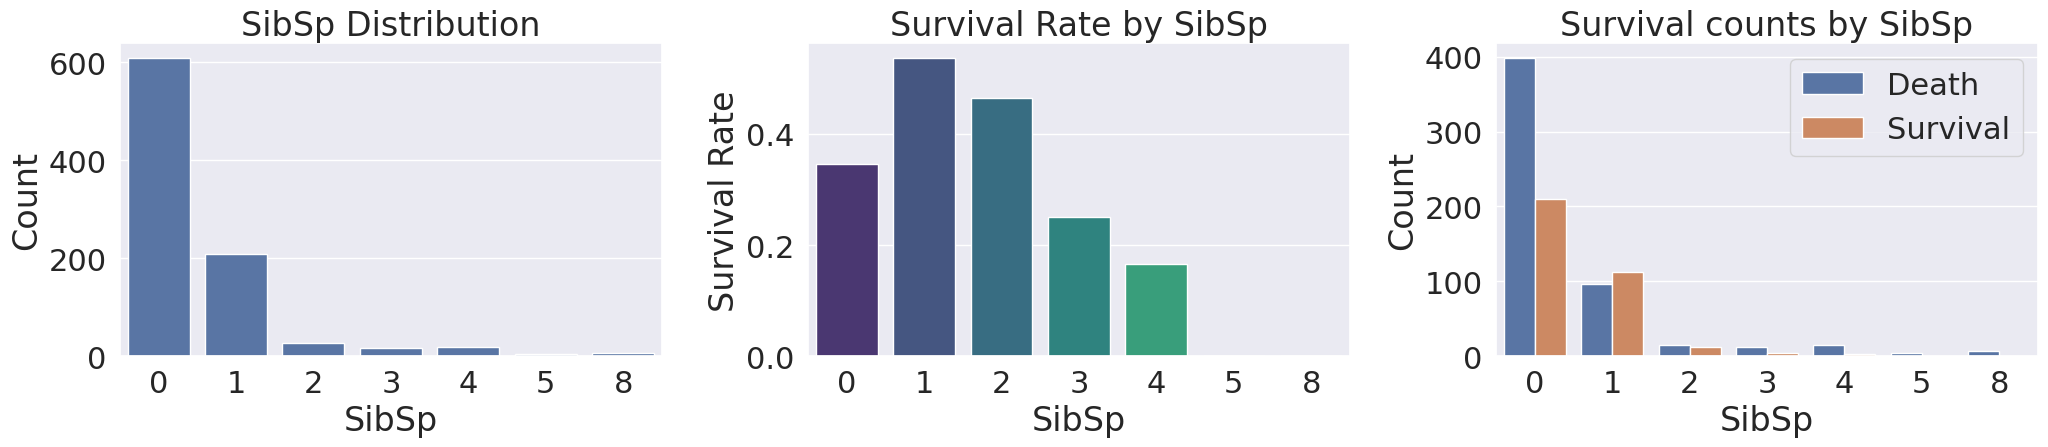

In [ ]:
# @title Column name : SibSp - 시각화
fig, ax = plt.subplots(1, 3, figsize=(21, 5))

SibSp_survival = data_train_test[0][['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

sns.countplot(data=data_train_test[0], x='SibSp', ax=ax[0])
ax[0].set(title='SibSp Distribution', xlabel='SibSp', ylabel='Count')

sns.barplot(data=SibSp_survival, x='SibSp', y='Survived', ax=ax[1], palette='viridis')
ax[1].set(title='Survival Rate by SibSp', ylabel='Survival Rate', xlabel='SibSp')

sns.countplot(data=data_train_test[0], x='SibSp', hue='Survived', ax=ax[2])
labels = ['Death', 'Survival']
ax[2].legend(labels=labels)
ax[2].set(title='Survival counts by SibSp', xlabel='SibSp', ylabel='Count')

plt.tight_layout()
plt.show()


## 3.9 Parch

In [ ]:
# @title Column name : Parch - 승객과 함께 탑승한 부모 또는 자녀의 수

print(f"unique values : {data_train_test[0]['Parch'].unique()}")
print("-"*50)
data_train_test[0]['Parch'].value_counts()

unique values : [0 1 2 5 3 4 6]
--------------------------------------------------


,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


<ipython-input-30-a1bd388f6be0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Parch_survival, x='Parch', y='Survived', ax=ax[1], palette='viridis')


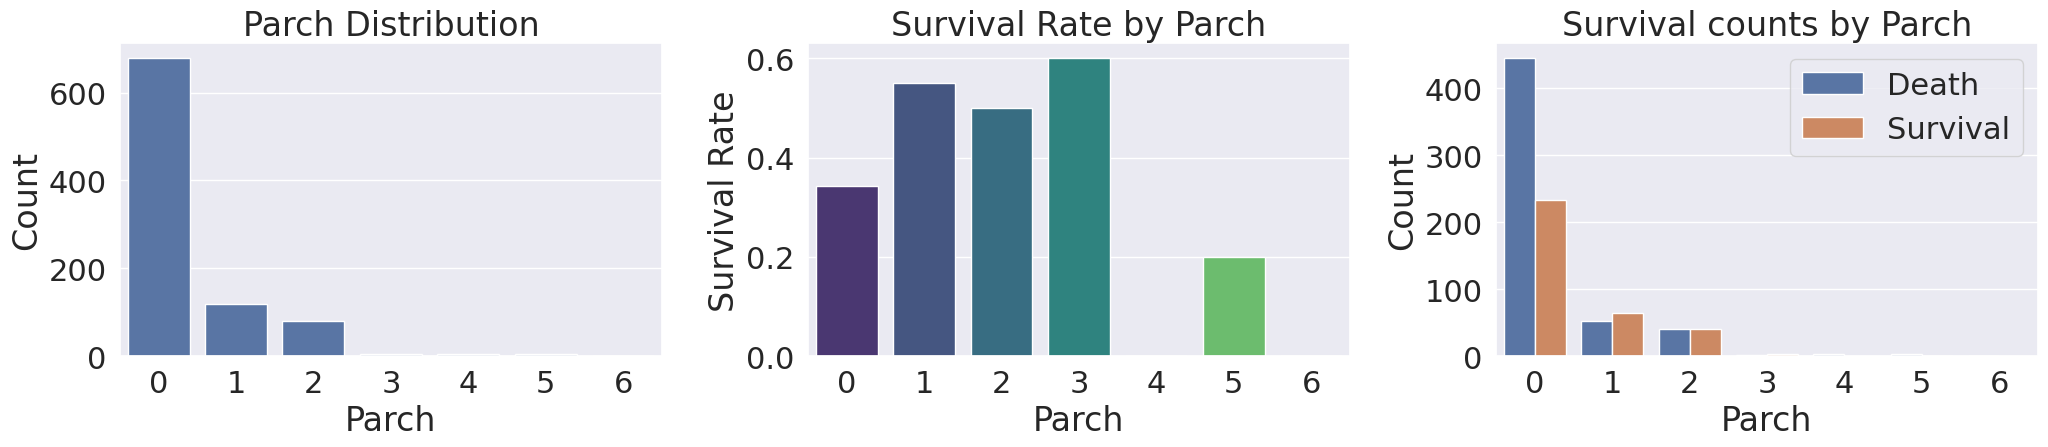

In [ ]:
# @title Column name : Parch - 시각화

fig, ax = plt.subplots(1, 3, figsize=(21, 5))

Parch_survival = data_train_test[0][['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

sns.countplot(data=data_train_test[0], x='Parch', ax=ax[0])
ax[0].set(title='Parch Distribution', xlabel='Parch', ylabel='Count')

sns.barplot(data=Parch_survival, x='Parch', y='Survived', ax=ax[1], palette='viridis')
ax[1].set(title='Survival Rate by Parch', ylabel='Survival Rate', xlabel='Parch')

sns.countplot(data=data_train_test[0], x='Parch', hue='Survived', ax=ax[2])
labels = ['Death', 'Survival']
ax[2].legend(labels=labels)
ax[2].set(title='Survival counts by Parch', xlabel='Parch', ylabel='Count')

plt.tight_layout()
plt.show()


In [ ]:
# @title SibSp + Parch + 1 로 Familysize 생성

for data in data_train_test:
    data['Familysize'] = data['SibSp'] + data['Parch'] + 1

# 삭제할 Feature
drop_feature = ['SibSp', 'Parch']

for data in data_train_test:
    data.drop(drop_feature, inplace=True, axis=1)

## 3.10 Ticket

In [ ]:
# @title Column name : Ticket - 승객의 티켓 번호

# Ticket의 유니크한 값 확인
print(f"Unique values : {data_train_test[0]['Ticket'].nunique()}")
print("-" * 50)
print(data_train_test[0]['Ticket'].value_counts())  # 상위 10개 티켓 번호 출력

Unique values : 681
--------------------------------------------------
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64


## 3.11 Fare

In [ ]:
# @title Column name : Fare - 승객이 지불한 운임 요금

print(f"unique values : {data_train_test[0]['Fare'].unique()[:50]}")
print("-"*50)
data_train_test[0]['Fare'].value_counts()

unique values : [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458]
--------------------------------------------------


,count
Fare,
8.0500,43
13.0000,42
7.8958,38
7.7500,34
26.0000,31
...,...
35.0000,1
28.5000,1
6.2375,1


<ipython-input-34-fa68fbc17598>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Death', 'Survival'])


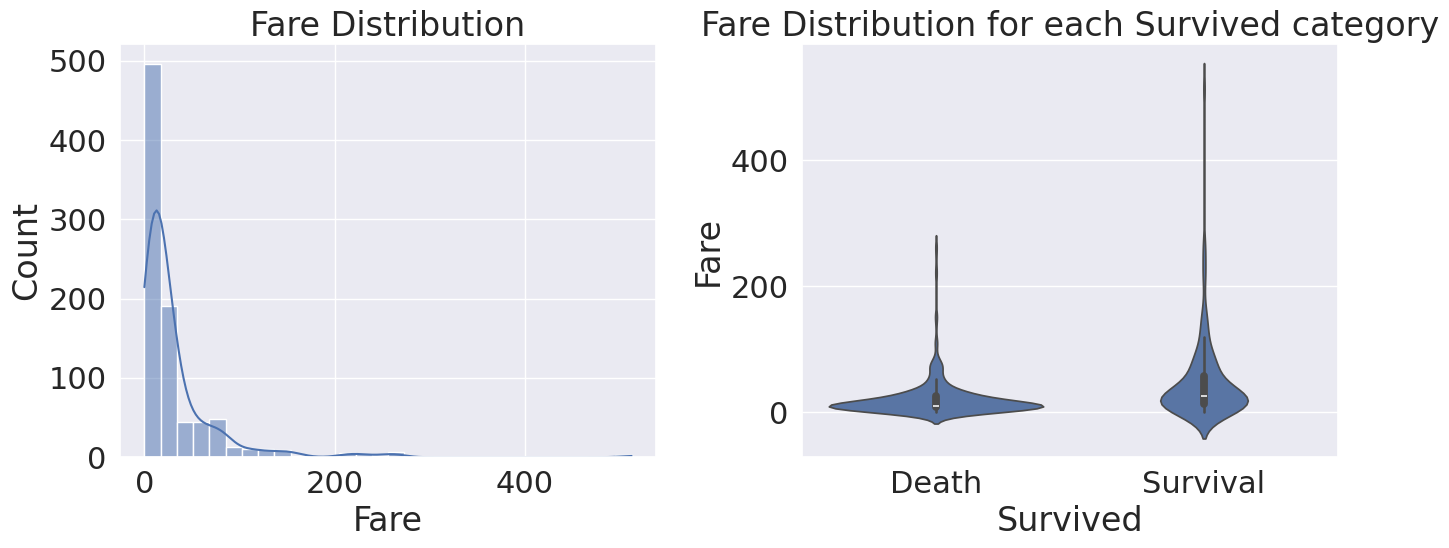

In [ ]:
# @title Column name : Fare - 시각화

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data_train_test[0]['Fare'], bins=30, kde=True, ax=ax[0])
ax[0].set(title='Fare Distribution', xlabel='Fare', ylabel='Count')

sns.violinplot(data=data_train_test[0], x='Survived', y='Fare', ax=ax[1])
ax[1].set(title='Fare Distribution for each Survived category', xlabel='Survived', ylabel='Fare')
ax[1].set_xticklabels(['Death', 'Survival'])

plt.tight_layout()
plt.show()

In [ ]:
# @title Column name : Fare - 결측치 제거

# Fare 결측값에 Pclass별 가격의 평균값으로 변경
for data in data_train_test:
    data['Fare'].fillna(data.groupby('Pclass')['Fare'].transform('mean'), inplace=True)

# FareRange에 N등분 한 범위를 넣어줍니다.
data_train_test[0]['FareRange'] = pd.cut(data_train_test[0]['Fare'], 4)

# FareRange 의 값마다 생존율을 구합니다.
data_train_test[0][['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='FareRange', ascending=True)

# FareRange 범위 대로 값 변경
for data in data_train_test:
    data.loc[ data['Fare'] <= 128, 'Fare'] = 0
    data.loc[(data['Fare'] > 128) & (data['Fare'] <= 256), 'Fare'] = 1
    data.loc[(data['Fare'] > 256) & (data['Fare'] <= 384), 'Fare'] = 2
    data.loc[data['Fare'] > 384, 'Fare'] = 3
    # int 로 변경
    data['Fare'] = data['Fare'].astype(int)

<ipython-input-35-9fb66e2a2833>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Fare'].fillna(data.groupby('Pclass')['Fare'].transform('mean'), inplace=True)
<ipython-input-35-9fb66e2a2833>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_train_test[0][['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().s

## 3.12 Embarked

In [ ]:
# @title Column name : Embarked - 승객이 탑승한 항구
# S항구, C항구, Q항구 3종류의 항구가 있으며 결측값이 존재

print(f"unique values : {data_train_test[0]['Embarked'].unique()}")
print("-"*50)
data_train_test[0]['Embarked'].value_counts()

unique values : ['S' 'C' 'Q' nan]
--------------------------------------------------


,count
Embarked,
S,644
C,168
Q,77


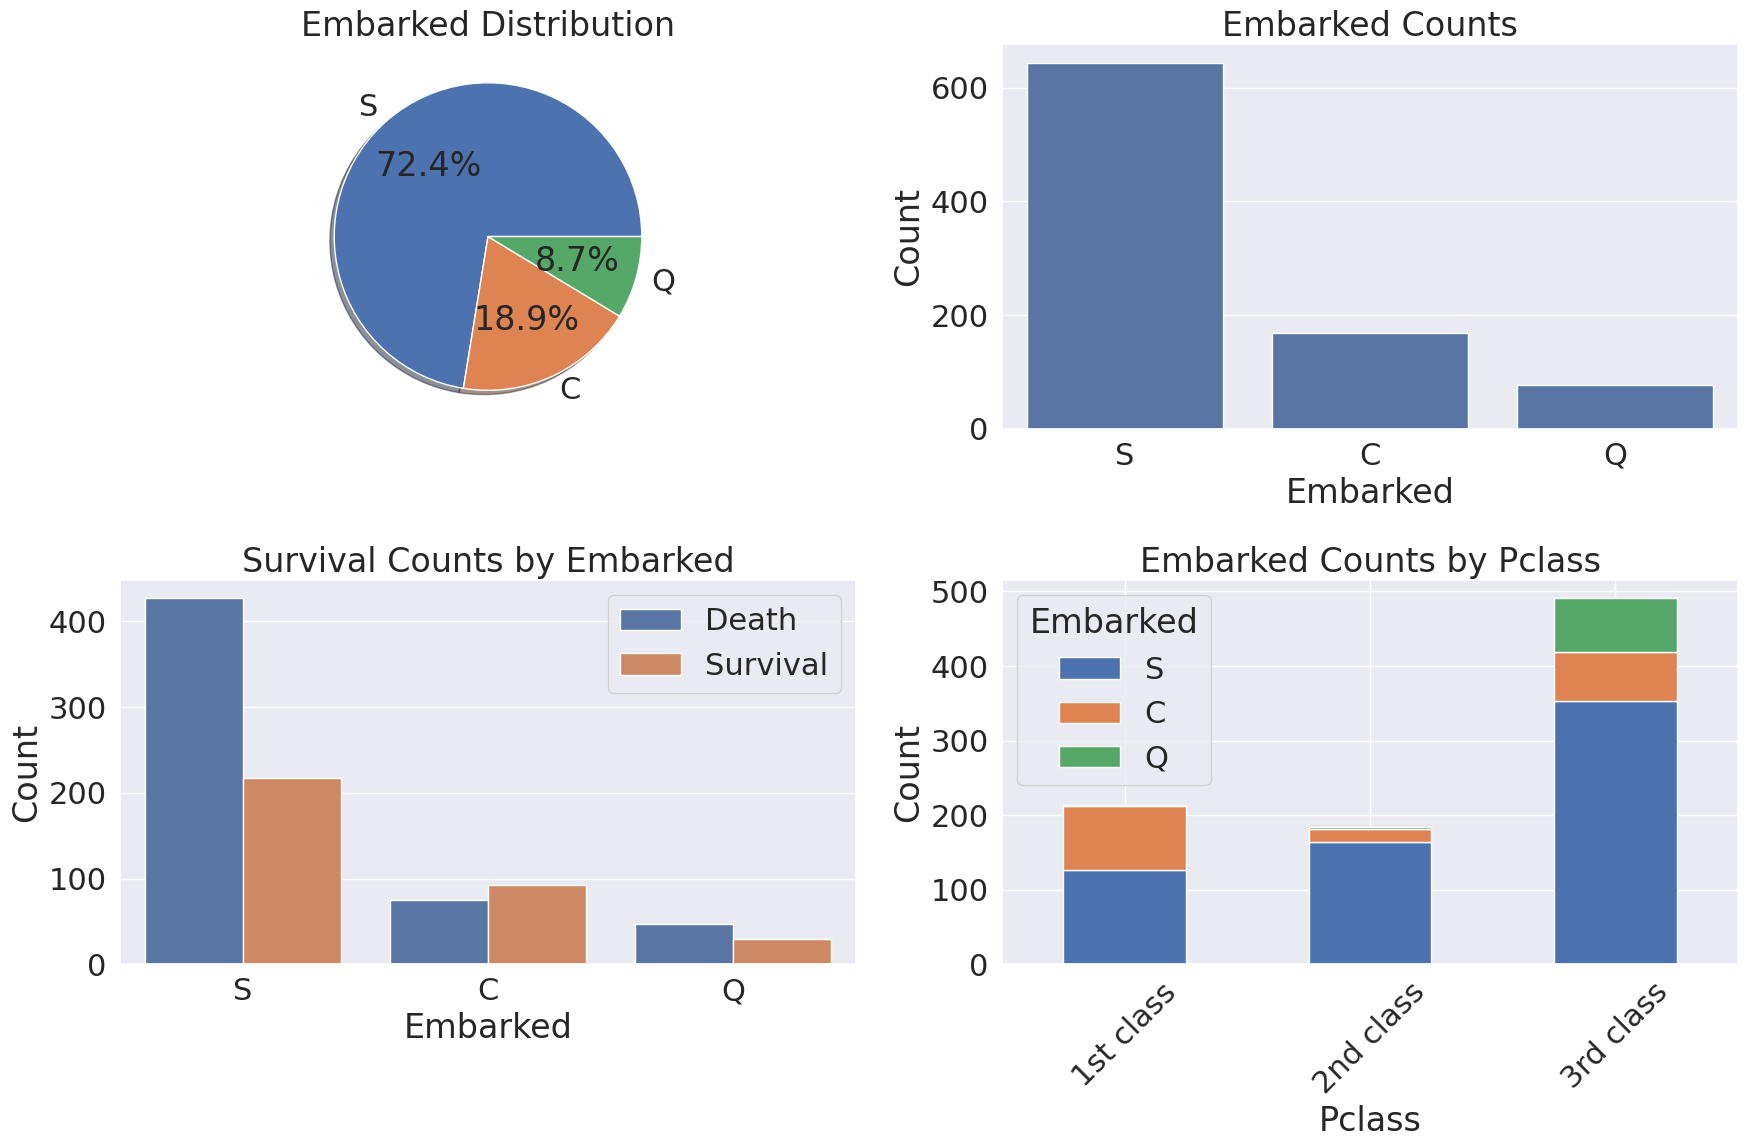

In [ ]:
# @title Column name : Embarked - 시각화

fig, ax = plt.subplots(2, 2, figsize=(18, 12))

data_train_test[0]['Embarked'].value_counts().plot.pie(ax=ax[0, 0], shadow=True, autopct='%1.1f%%')
ax[0, 0].set(title='Embarked Distribution', ylabel='')

sns.countplot(data=data_train_test[0], x='Embarked', ax=ax[0, 1])
ax[0, 1].set(title='Embarked Counts', xlabel='Embarked', ylabel='Count')

sns.countplot(data=data_train_test[0], x='Embarked', hue='Survived', ax=ax[1, 0])
labels = ['Death', 'Survival']
ax[1, 0].legend(labels=labels)
ax[1, 0].set(title='Survival Counts by Embarked', xlabel='Embarked', ylabel='Count')

Pclass1 = data_train_test[0][data_train_test[0]['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = data_train_test[0][data_train_test[0]['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = data_train_test[0][data_train_test[0]['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, ax=ax[1, 1])
ax[1, 1].set(title='Embarked Counts by Pclass', xlabel='Pclass', ylabel='Count')
ax[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# @title Column name : Embarked - 결측치 제거

for data in data_train_test:
    freq_port = data.Embarked.dropna().mode()[0]
    print(freq_port)
    data['Embarked'] = data['Embarked'].fillna(freq_port)
    print("결측치 제거 후 Embarked 결측치 수:", data['Embarked'].isnull().sum())

S
결측치 제거 후 Embarked 결측치 수: 0
S
결측치 제거 후 Embarked 결측치 수: 0


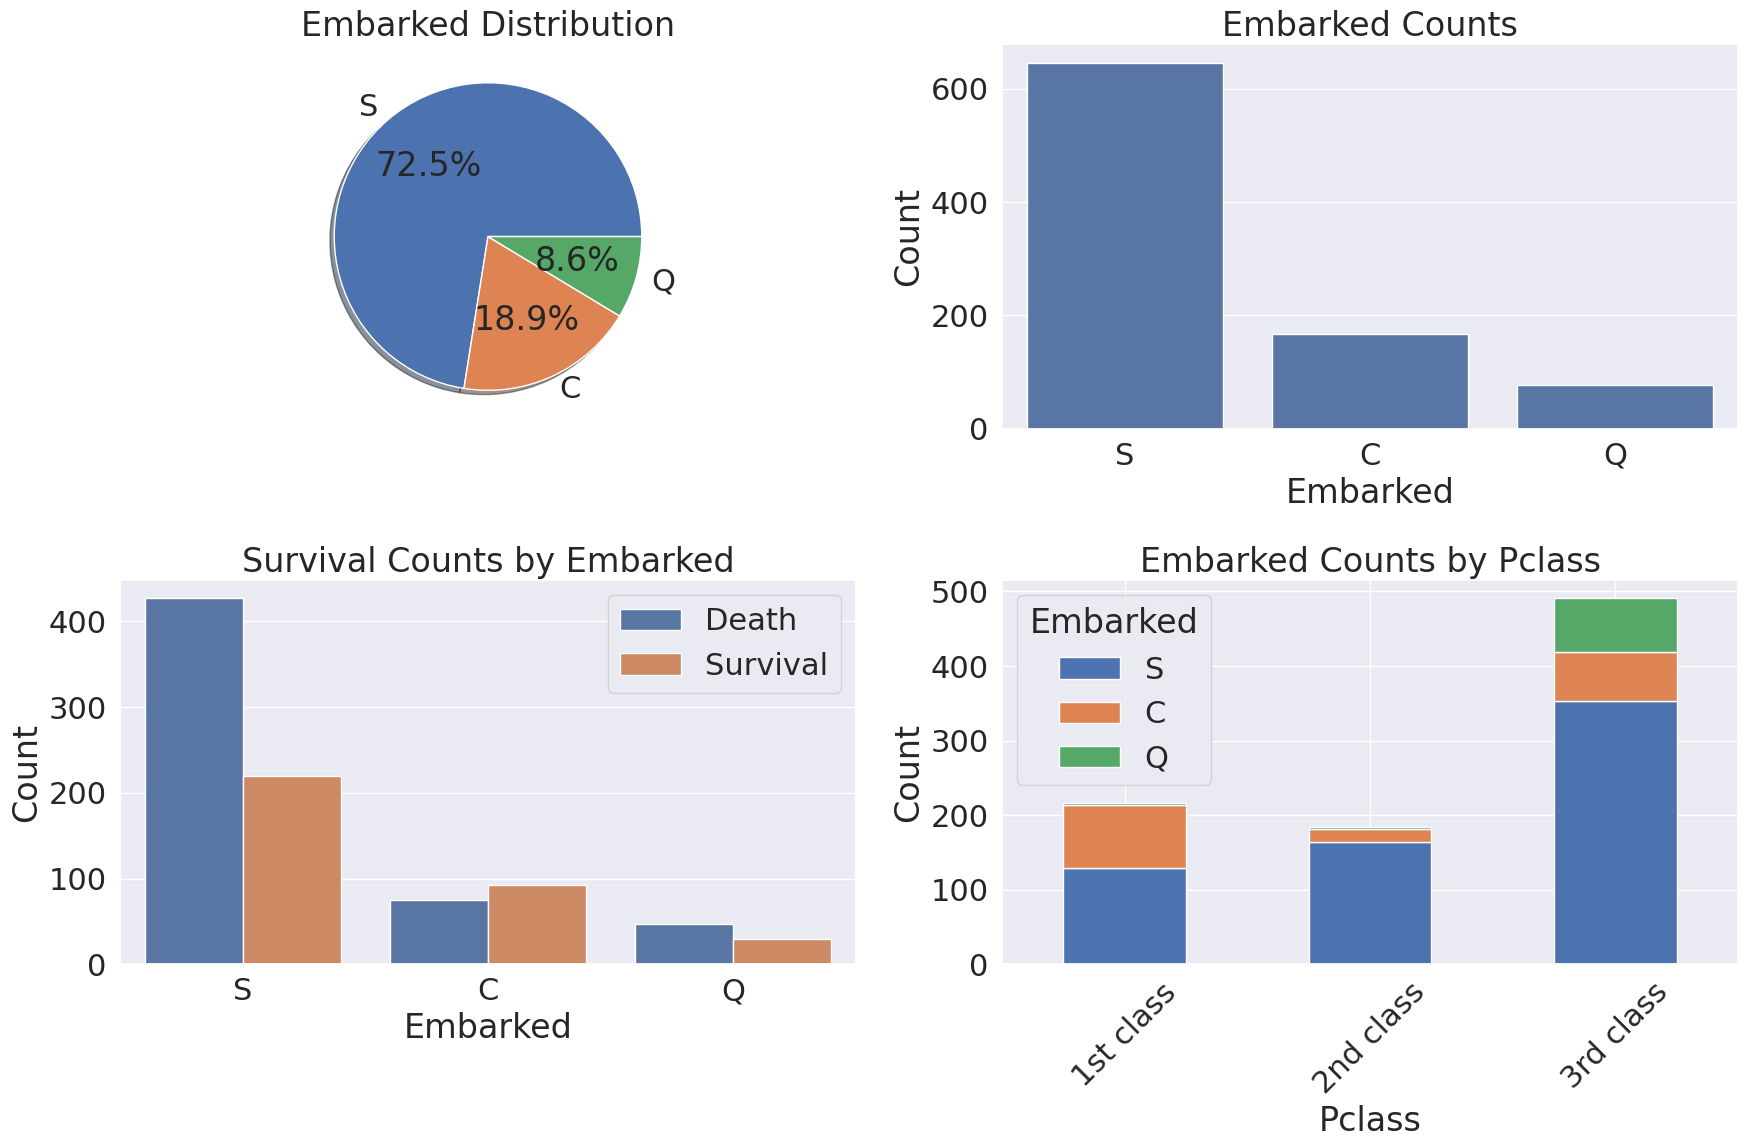

In [ ]:
# @title Column name : Embarked - 시각화

fig, ax = plt.subplots(2, 2, figsize=(18, 12))

data_train_test[0]['Embarked'].value_counts().plot.pie(ax=ax[0, 0], shadow=True, autopct='%1.1f%%')
ax[0, 0].set(title='Embarked Distribution', ylabel='')

sns.countplot(data=data_train_test[0], x='Embarked', ax=ax[0, 1])
ax[0, 1].set(title='Embarked Counts', xlabel='Embarked', ylabel='Count')

sns.countplot(data=data_train_test[0], x='Embarked', hue='Survived', ax=ax[1, 0])
labels = ['Death', 'Survival']
ax[1, 0].legend(labels=labels)
ax[1, 0].set(title='Survival Counts by Embarked', xlabel='Embarked', ylabel='Count')

Pclass1 = data_train_test[0][data_train_test[0]['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = data_train_test[0][data_train_test[0]['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = data_train_test[0][data_train_test[0]['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, ax=ax[1, 1])
ax[1, 1].set(title='Embarked Counts by Pclass', xlabel='Pclass', ylabel='Count')
ax[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# @title Column name : Embarked - 전처리

# 변경할 값을 dir에 저장
embarked_mapping = {'S':0, 'C':1, 'Q':2}

for data in data_train_test:
    data['Embarked'] = data['Embarked'].map(embarked_mapping).astype(int)

## 3.13 Cabin

In [ ]:
# @title Column name : Cabin - 승객이 탑승한 선실의 번호

print(f"Unique values : {data_train_test[0]['Cabin'].unique()}")
print("-" * 50)
print(data_train_test[0]['Cabin'].value_counts())

for data in data_train_test:
    # Cabin의 첫 번째 알파벳 추출
    data['Cabin_Zone'] = data['Cabin'].str[0]

Unique values : [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
---------------------------

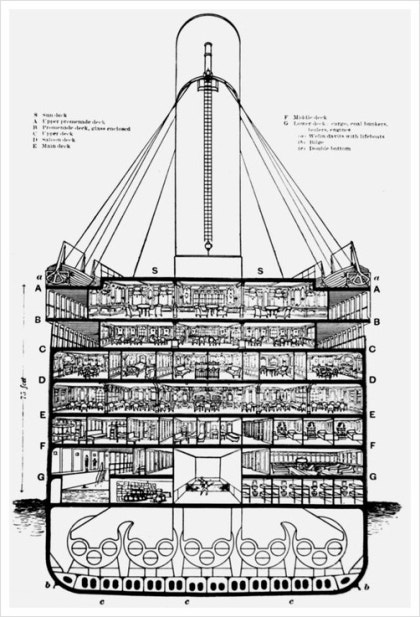

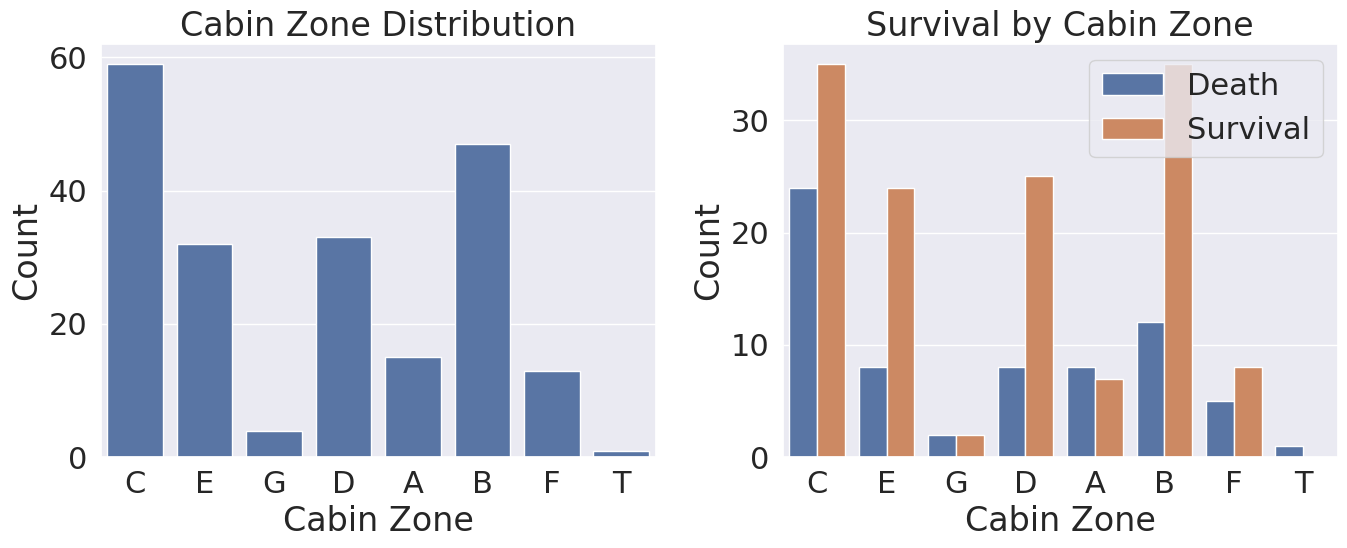

In [ ]:
# @title Column name : Cabin - 시각화

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=data_train_test[0], x='Cabin_Zone', ax=ax[0])
ax[0].set(title='Cabin Zone Distribution', xlabel='Cabin Zone', ylabel='Count')

sns.countplot(data=data_train_test[0], x='Cabin_Zone', hue='Survived', ax=ax[1])
labels = ['Death', 'Survival']
ax[1].legend(labels=labels)
ax[1].set(title='Survival by Cabin Zone', xlabel='Cabin Zone', ylabel='Count')

plt.tight_layout()
plt.show()

In [ ]:
# @title Column name : Cabin - 결측치 제거

for data in data_train_test:
    # Pclass별 Cabin Zone 최빈값 계산
    pclass_cabin_mode = data.groupby('Pclass')['Cabin_Zone'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else None
    )

    print("Pclass별 Cabin Zone 최빈값:")
    print(pclass_cabin_mode)
    print("-" * 50)

    # 최빈값으로 Cabin Zone 채우기
    data['Cabin_Zone_mode'] = data.apply(
        lambda row: pclass_cabin_mode[row['Pclass']] if pd.isnull(row['Cabin_Zone']) else row['Cabin_Zone'], axis=1
    )

    print("결측치 제거 후 Cabin Zone Mode 결측치 수:", data['Cabin_Zone_mode'].isnull().sum())

Pclass별 Cabin Zone 최빈값:
Pclass
1    C
2    F
3    F
Name: Cabin_Zone, dtype: object
--------------------------------------------------
결측치 제거 후 Cabin Zone Mode 결측치 수: 0
Pclass별 Cabin Zone 최빈값:
Pclass
1    C
2    F
3    F
Name: Cabin_Zone, dtype: object
--------------------------------------------------
결측치 제거 후 Cabin Zone Mode 결측치 수: 0


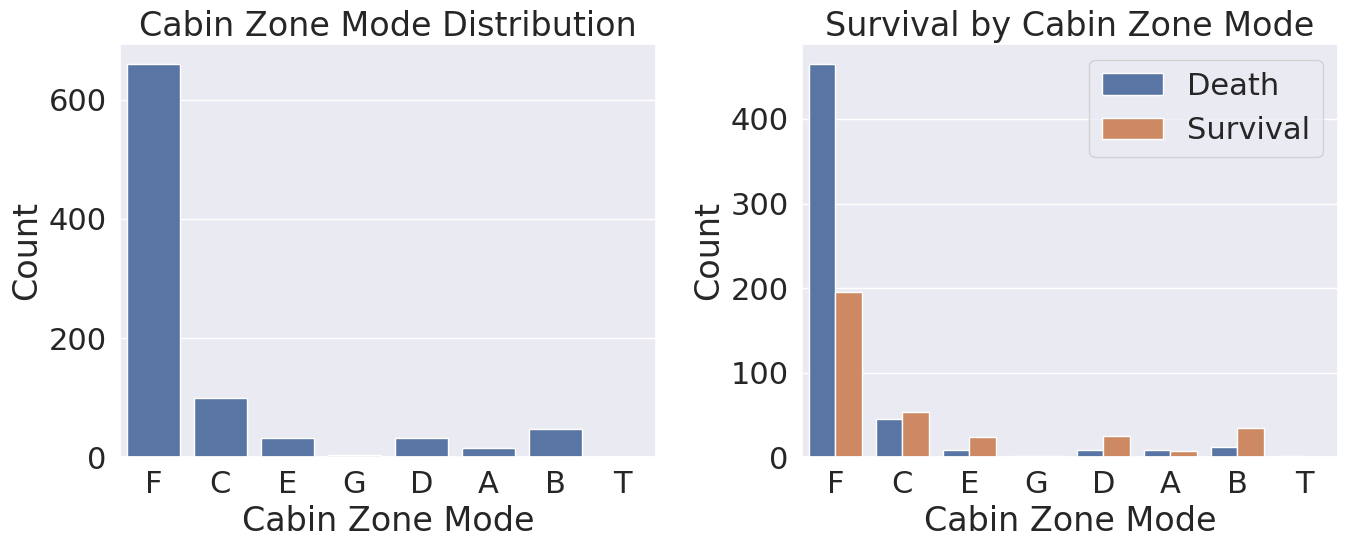

In [ ]:
# @title Column name : Cabin - 시각화

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=data_train_test[0], x='Cabin_Zone_mode', ax=ax[0])
ax[0].set(title='Cabin Zone Mode Distribution', xlabel='Cabin Zone Mode', ylabel='Count')

sns.countplot(data=data_train_test[0], x='Cabin_Zone_mode', hue='Survived', ax=ax[1])
labels = ['Death', 'Survival']
ax[1].legend(labels=labels)
ax[1].set(title='Survival by Cabin Zone Mode', xlabel='Cabin Zone Mode', ylabel='Count')

plt.tight_layout()
plt.show()

In [ ]:
# @title Column name : Cabin - 결측치 제거

from sklearn.impute import KNNImputer

for data in data_train_test:
    print("Cabin Zone 결측치 수:", data['Cabin_Zone'].isnull().sum())
    print("-" * 50)

    # K-NN 적용을 위한 데이터 준비
    knn_features = ['Pclass', 'Fare', 'Embarked']
    data_encoded = data.copy()

    # Embarked를 숫자로 변환
    data_encoded['Embarked'] = data_encoded['Embarked']

    # Cabin Zone을 숫자로 변환
    cabin_mapping = {label: idx for idx, label in enumerate(data['Cabin_Zone'].dropna().unique())}
    data_encoded['Cabin_Zone'] = data_encoded['Cabin_Zone'].map(cabin_mapping)

    # K-NN Imputer 생성 및 학습
    imputer = KNNImputer(n_neighbors=5)
    knn_data = data_encoded[knn_features + ['Cabin_Zone']]
    knn_imputed = imputer.fit_transform(knn_data)

    # 예측 결과를 DataFrame으로 변환
    knn_result = pd.DataFrame(knn_imputed, columns=knn_features + ['Cabin_Zone'])

    # Cabin Zone 복원
    reverse_cabin_mapping = {idx: label for label, idx in cabin_mapping.items()}
    knn_result['Cabin_Zone'] = knn_result['Cabin_Zone'].round().map(reverse_cabin_mapping)

    # 원본 데이터에 대입
    data['Cabin_Zone_KNN'] = knn_result['Cabin_Zone']

    # 결과 확인
    print("결측치 처리 후 Cabin Zone KNN 결측치 수:", data['Cabin_Zone_KNN'].isnull().sum())
    print("-" * 50)
    print(data[['Pclass', 'Fare', 'Embarked', 'Cabin_Zone_KNN']].head())

Cabin Zone 결측치 수: 687
--------------------------------------------------
결측치 처리 후 Cabin Zone KNN 결측치 수: 0
--------------------------------------------------
   Pclass  Fare  Embarked Cabin_Zone_KNN
0       3     0         0              D
1       1     0         1              C
2       3     0         0              D
3       1     0         0              C
4       3     0         0              D
Cabin Zone 결측치 수: 327
--------------------------------------------------
결측치 처리 후 Cabin Zone KNN 결측치 수: 0
--------------------------------------------------
   Pclass  Fare  Embarked Cabin_Zone_KNN
0       3     0         2              F
1       3     0         0              F
2       2     0         2              C
3       3     0         0              F
4       3     0         0              F


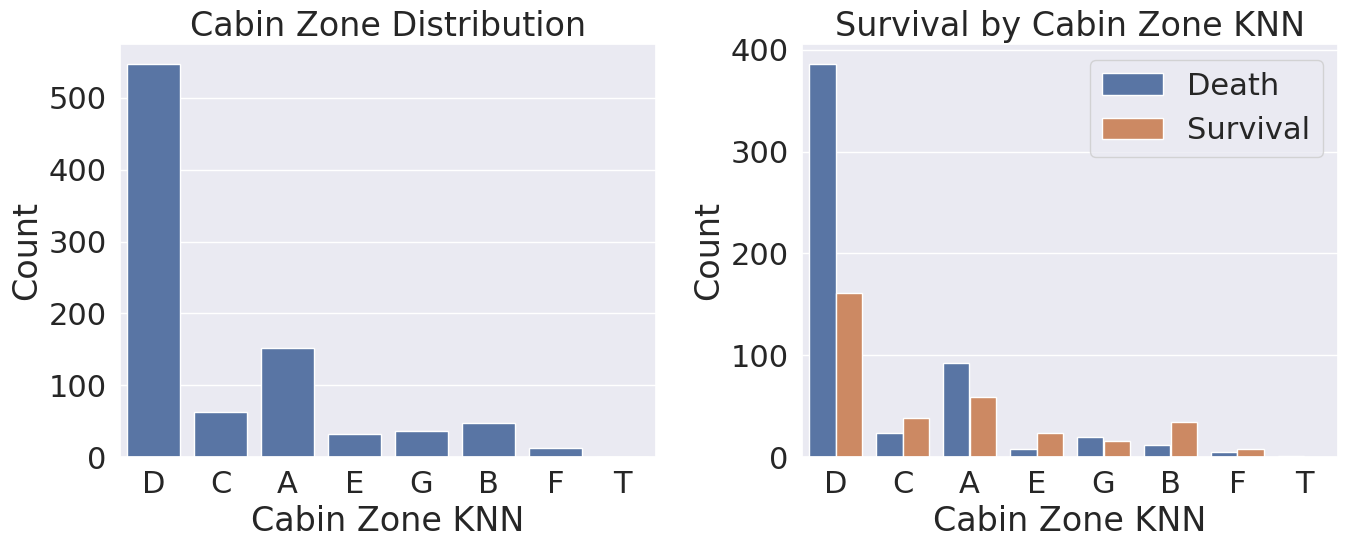

In [ ]:
# @title Column name : Cabin - 시각화

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=data_train_test[0], x='Cabin_Zone_KNN', ax=ax[0])
ax[0].set(title='Cabin Zone Distribution', xlabel='Cabin Zone KNN', ylabel='Count')

sns.countplot(data=data_train_test[0], x='Cabin_Zone_KNN', hue='Survived', ax=ax[1])
labels = ['Death', 'Survival']
ax[1].legend(labels=labels)
ax[1].set(title='Survival by Cabin Zone KNN', xlabel='Cabin Zone KNN', ylabel='Count')

plt.tight_layout()
plt.show()

In [ ]:
# @title Column name : Cabin - 전처리

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for data in data_train_test:
    data['Cabin_Zone_KNN'] = le.fit_transform(data['Cabin_Zone_KNN'])
    data['Cabin_Zone_mode'] = le.fit_transform(data['Cabin_Zone_mode'])

## 3.14 각 feature 결측치 확인

In [ ]:
# @title 결측치가 존재하는 컬럼 명

# In train data
null_columns = data_train_test[0].columns[data_train_test[0].isnull().any()]
print("nul columns : ", null_columns)
print('-'*50)
print("null rate")
print()
print((data_train_test[0].isnull().sum()/(len(data_train_test[0])))*100)

# In test data
null_columns = data_train_test[1].columns[data_train_test[1].isnull().any()]
print("nul columns : ", null_columns)
print('-'*50)
print("null rate")
print()
print((data_train_test[1].isnull().sum()/(len(data_train_test[1])))*100)

nul columns :  Index(['Cabin', 'Cabin_Zone'], dtype='object')
--------------------------------------------------
null rate

PassengerId         0.000000
Survived            0.000000
Pclass              0.000000
Sex                 0.000000
Age                 0.000000
Ticket              0.000000
Fare                0.000000
Cabin              77.104377
Embarked            0.000000
Title               0.000000
Title_0             0.000000
Title_1             0.000000
Title_2             0.000000
Title_3             0.000000
Title_4             0.000000
Familysize          0.000000
FareRange           0.000000
Cabin_Zone         77.104377
Cabin_Zone_mode     0.000000
Cabin_Zone_KNN      0.000000
dtype: float64
nul columns :  Index(['Cabin', 'Cabin_Zone'], dtype='object')
--------------------------------------------------
null rate

PassengerId         0.000000
Pclass              0.000000
Sex                 0.000000
Age                 0.000000
Ticket              0.000000
Fare        

# 4\. Machine Learning

In [ ]:
# @title ML 라이브러리 준비
# K-Fold를 위한 준비
from sklearn.model_selection import KFold
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# confusion matrix 준비
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# SVC 사용 준비
from sklearn.svm import SVC

[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Familysize', 'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4'], ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Familysize', 'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Cabin_Zone_mode'], ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Familysize', 'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Cabin_Zone_KNN']]


In [ ]:
# @title 모델 학습에 사용할 feature 준비
# 학습에 사용할 Feature를 List에 저장
default_column_list = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Familysize', 'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4']

no_carbin_column_list = default_column_list
carbin_mode_column_list = default_column_list + ['Cabin_Zone_mode']
carbin_KNN_column_list = default_column_list + ['Cabin_Zone_KNN']

experiment_list = [no_carbin_column_list, carbin_mode_column_list, carbin_KNN_column_list]
experiment_name_list = ["no_carbin", "carbin_mode", "carbin_KNN"]
print(experiment_list)

no_carbin 

Mean Accuracy: 0.8037
Std Accuracy: 0.0490

Total Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       549
           1       0.81      0.64      0.72       342

    accuracy                           0.80       891
   macro avg       0.80      0.77      0.78       891
weighted avg       0.80      0.80      0.80       891



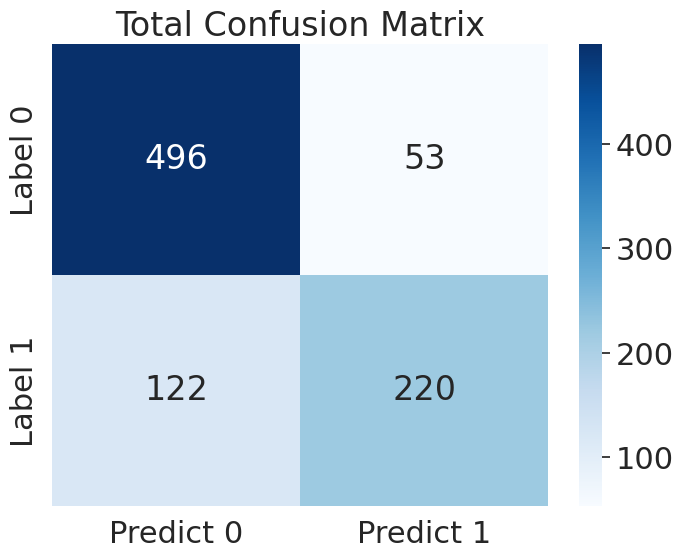

carbin_mode 

Mean Accuracy: 0.8071
Std Accuracy: 0.0455

Total Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       549
           1       0.80      0.67      0.73       342

    accuracy                           0.81       891
   macro avg       0.80      0.78      0.79       891
weighted avg       0.81      0.81      0.80       891



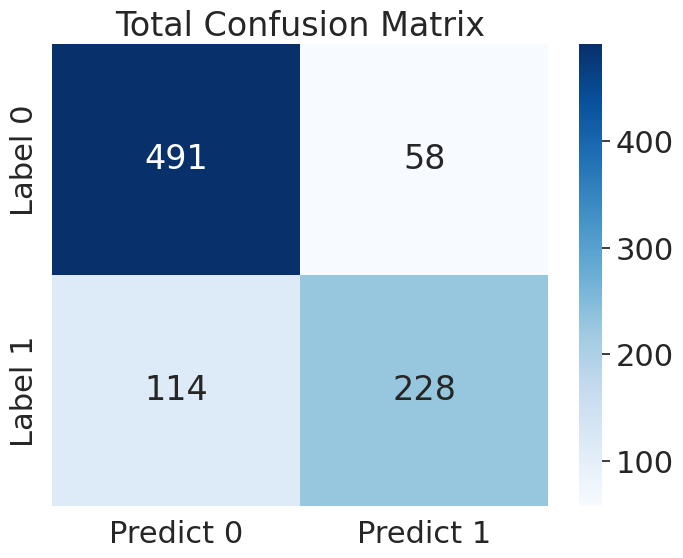

carbin_KNN 

Mean Accuracy: 0.8026
Std Accuracy: 0.0576

Total Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       549
           1       0.79      0.66      0.72       342

    accuracy                           0.80       891
   macro avg       0.80      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



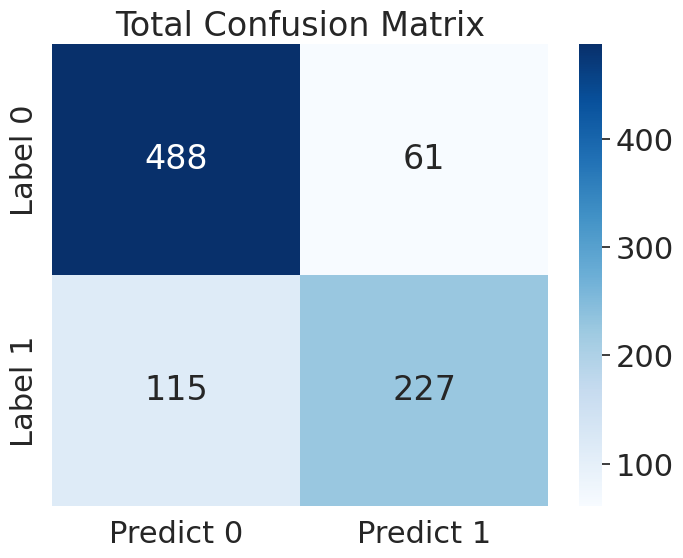

In [ ]:
# @title ML - Decision Tree
for data_column_list, experiment_name in zip(experiment_list, experiment_name_list):
    print(experiment_name, "\n")

    train_dt = data_train_test[0].copy()
    train_dt = train_dt[data_column_list]

    X = train_dt.drop('Survived', axis=1).values
    y = train_dt['Survived'].values

    # K-Fold 교차 검증 초기화
    kfold = KFold(n_splits=10, shuffle=True, random_state=1230)

    # 모델 초기화
    model = DecisionTreeClassifier(random_state=1230)

    fold_accuracies = []
    fold_confusion_matrices = []
    fold_classification_reports = []

    all_y_true = []
    all_y_pred = []

    # K-Fold 교차 검증 수행
    for fold, (train_index, test_index) in enumerate(kfold.split(X), 1):
        # 훈련 및 검증 데이터 분리
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        # 모델 훈련
        model.fit(X_train_fold, y_train_fold)

        # 검증 데이터에 대한 예측
        y_pred_fold = model.predict(X_test_fold)

        # 정확도 계산
        acc = accuracy_score(y_test_fold, y_pred_fold)
        fold_accuracies.append(acc)

        # 혼동 행렬 계산
        cm = confusion_matrix(y_test_fold, y_pred_fold)
        fold_confusion_matrices.append(cm)

        report = classification_report(y_test_fold, y_pred_fold, output_dict=True)
        fold_classification_reports.append(report)

        all_y_true.extend(y_test_fold)
        all_y_pred.extend(y_pred_fold)

    # 전체 폴드의 평균 정확도 및 표준편차 계산
    mean_accuracy = np.mean(fold_accuracies)
    std_accuracy = np.std(fold_accuracies)
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Std Accuracy: {std_accuracy:.4f}\n")

    total_report = classification_report(all_y_true, all_y_pred)
    print("Total Classification Report:")
    print(total_report)

    # 모든 폴드의 혼동 행렬을 합산하여 전체 혼동 행렬 생성
    total_cm = np.sum(fold_confusion_matrices, axis=0)

    # 혼동 행렬 시각화
    plt.figure(figsize=(8,6))
    sns.heatmap(
        total_cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Predict 0', 'Predict 1'],
        yticklabels=['Label 0', 'Label 1']
    )
    plt.title('Total Confusion Matrix')
    plt.show()

    print('=' * 200)


no_carbin 

Mean Accuracy: 0.8340
Std Accuracy: 0.0435

Total Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       549
           1       0.82      0.73      0.77       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



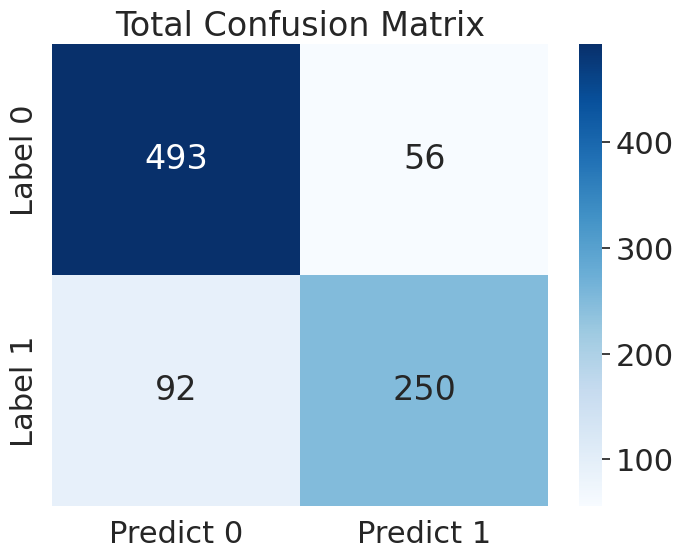

carbin_mode 

Mean Accuracy: 0.8329
Std Accuracy: 0.0425

Total Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       549
           1       0.81      0.73      0.77       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



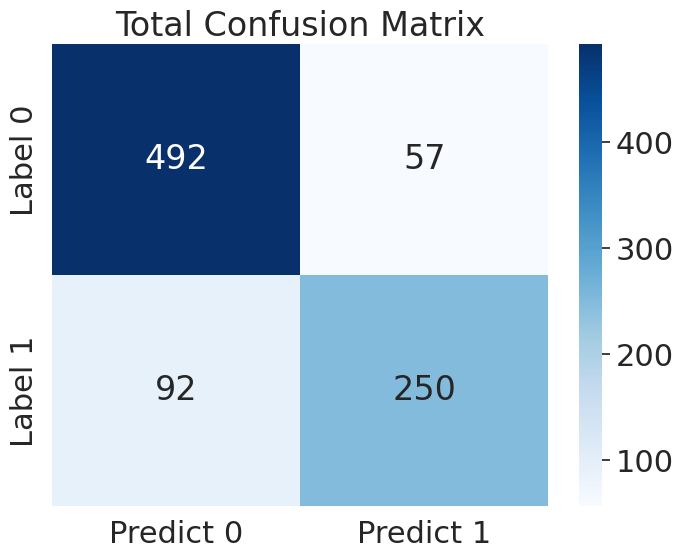

carbin_KNN 

Mean Accuracy: 0.8340
Std Accuracy: 0.0435

Total Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       549
           1       0.82      0.73      0.77       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



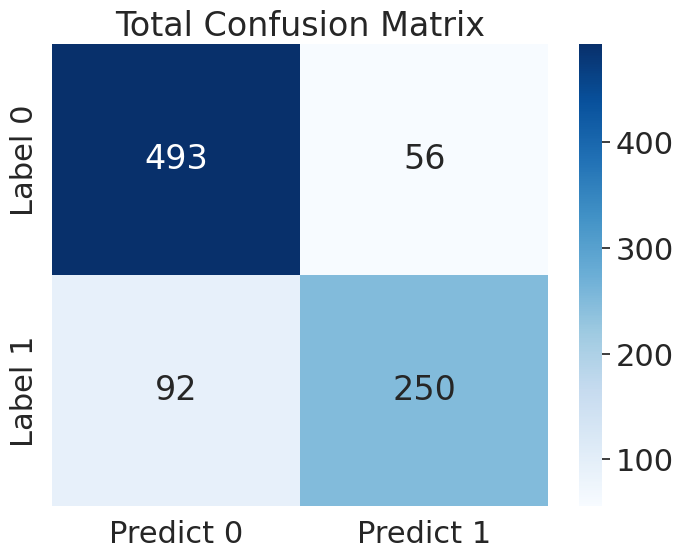

In [ ]:
# @title ML - SVM
for data_column_list, experiment_name in zip(experiment_list, experiment_name_list):
    print(experiment_name, "\n")

    train_dt = data_train_test[0].copy()
    train_dt = train_dt[data_column_list]

    X = train_dt.drop('Survived', axis=1).values
    y = train_dt['Survived'].values

    # K-Fold 교차 검증 초기화
    kfold = KFold(n_splits=10, shuffle=True, random_state=1230)

    # 모델 초기화
    model = SVC(random_state=1230)

    # 각 폴드에서의 성능을 저장할 리스트 초기화
    fold_accuracies = []
    fold_confusion_matrices = []
    fold_classification_reports = []

    all_y_true = []
    all_y_pred = []

    # K-Fold 교차 검증 수행
    for fold, (train_index, test_index) in enumerate(kfold.split(X), 1):
        # 훈련 및 검증 데이터 분리
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        # 모델 훈련
        model.fit(X_train_fold, y_train_fold)

        # 검증 데이터에 대한 예측
        y_pred_fold = model.predict(X_test_fold)

        # 정확도 계산
        acc = accuracy_score(y_test_fold, y_pred_fold)
        fold_accuracies.append(acc)

        # 혼동 행렬 계산
        cm = confusion_matrix(y_test_fold, y_pred_fold)
        fold_confusion_matrices.append(cm)

        report = classification_report(y_test_fold, y_pred_fold, output_dict=True)
        fold_classification_reports.append(report)

        all_y_true.extend(y_test_fold)
        all_y_pred.extend(y_pred_fold)

    # 전체 폴드의 평균 정확도 및 표준편차 계산
    mean_accuracy = np.mean(fold_accuracies)
    std_accuracy = np.std(fold_accuracies)
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Std Accuracy: {std_accuracy:.4f}\n")

    total_report = classification_report(all_y_true, all_y_pred)
    print("Total Classification Report:")
    print(total_report)

    # 모든 폴드의 혼동 행렬을 합산하여 전체 혼동 행렬 생성
    total_cm = np.sum(fold_confusion_matrices, axis=0)

    # 혼동 행렬 시각화
    plt.figure(figsize=(8,6))
    sns.heatmap(
        total_cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Predict 0', 'Predict 1'],
        yticklabels=['Label 0', 'Label 1']
    )
    plt.title('Total Confusion Matrix')
    plt.show()

    print('=' * 200)